In [10]:
import cv2
import albumentations as A
from torch.utils.data import Dataset
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from torchvision import transforms

### Cutout 

- Randomly replace square patches with noise

- 사각 패치를 랜덤한 위치에 두는 방법

- 이 논문에서는 모델의 훈련과정 동안 입력 이미지에서 무작위로 정사각형 영역을 가리는 단순한 방법

In [11]:
class Alb_aug_dataset(Dataset) :
    def __init__(self, file_path, transform=None) :
        self.file_paths = file_path
        self.transform = transform
        pass

    def __getitem__(self, index) :
        file_path = self.file_paths[index]

        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform :
            image = self.transform(image = image)['image']
        
        return image

    def __len__(self) :
        return len(self.file_paths)

In [12]:
## Cutout 작업 - 이미지에 사각형 넣기 
alb_transform = A.Compose([
    A.Resize(256,256),
    A.Cutout(num_holes=20, max_h_size=15, max_w_size=15, p=1.0),
    ToTensorV2()
])

c:\Users\tempe\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [13]:
file_path = ["./orange.png"]
alb_dataset = Alb_aug_dataset(file_path, transform = alb_transform)

In [14]:
for i in range(100):
    sample = alb_dataset[0]

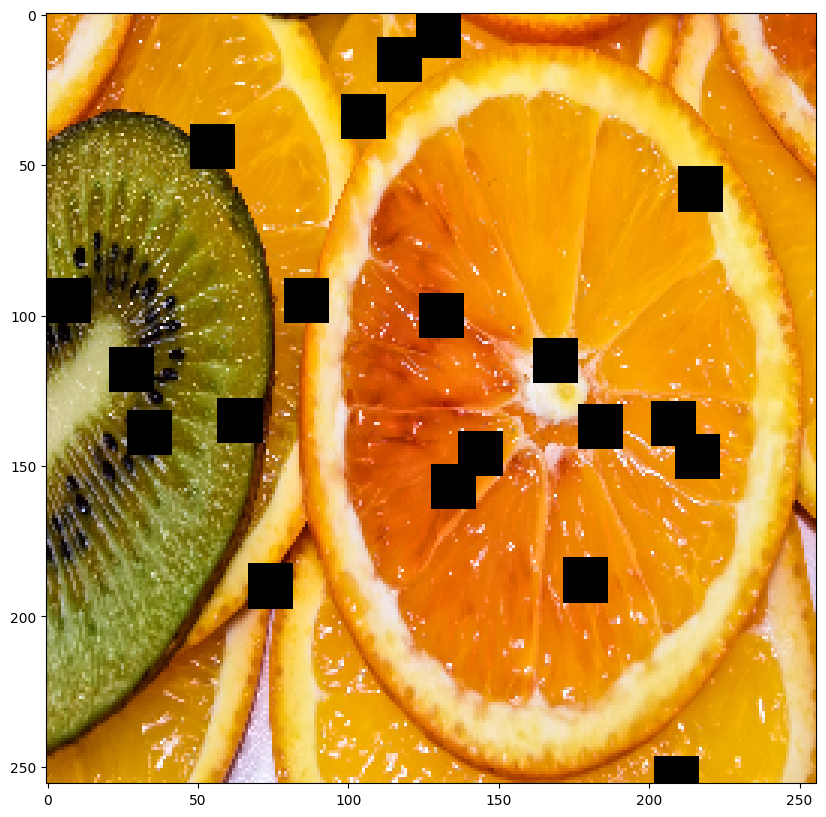

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()